In [ ]:
import numpy as np
from timeit import timeit
import matplotlib.pylab as plt
from numba import njit


# define all function I will use in this assignment

def slow_matrix_product(mat1, mat2):
    """Multiply two matrices."""
    assert mat1.shape[1] == mat2.shape[0]
    result = []
    for c in range(mat2.shape[1]):
        column = []
        for r in range(mat1.shape[0]):
            value = 0
            for i in range(mat1.shape[1]):
                value += mat1[r, i] * mat2[i, c]
            column.append(value)
        result.append(column)
    return np.array(result).transpose()


# my function faster_matrix_product which is more efficiently than slow_matrix_product
def fast_matrix_product(mat1, mat2):
    """Multiply two matrices."""
    assert mat1.shape[1] == mat2.shape[0]
    # replace list append operation with numpy array index operation
    # use np.zeros() to initialize numpy array
    result = np.zeros(shape=(mat1.shape[0], mat2.shape[1]))
    for r in range(mat1.shape[0]):
        for c in range(mat2.shape[1]):
            # replace the loop with dot product
            result[r, c] = np.dot(mat1[r], mat2[:, c])
    return result


# copy of my function faster_matrix_product that is just-in-time (JIT) compiled using Numba
@njit
def fast_matrix_product_jit(mat1, mat2):
    """Multiply two matrices."""
    assert mat1.shape[1] == mat2.shape[0]
    # replace list append operation with numpy array index operation
    # use np.zeros() to initialize array
    result = np.zeros(shape=(mat1.shape[0], mat2.shape[1]))
    for r in range(mat1.shape[0]):
        for c in range(mat2.shape[1]):
            # replace the loop with dot product
            result[r, c] = np.dot(mat1[r], mat2[:, c])
    return result


# the below functions are used for counting time with timeit(...)

def slow_matrix_multiplication():
    slow_result = slow_matrix_product(matrix1, matrix2)


def fast_matrix_multiplication():
    fast_result = fast_matrix_product(matrix1, matrix2)


def fast_matrix_multiplication_jit():
    fast_jit_result = fast_matrix_product_jit(matrix1, matrix2)


def numpy_multiplication():
    np_result = matrix1 @ matrix2


def fast_matrix_c_c_multiplication_jit():
    fast_jit_result = fast_matrix_product_jit(matrix1, matrix2)


def fast_matrix_c_fortran_multiplication_jit():
    fast_jit_result = fast_matrix_product_jit(matrix1, matrix2_fortran)


def fast_matrix_fortran_c_multiplication_jit():
    fast_jit_result = fast_matrix_product_jit(matrix1_fortran, matrix2)


def fast_matrix_fortran_fortran_multiplication_jit():
    fast_jit_result = fast_matrix_product_jit(matrix1_fortran, matrix2_fortran)


# different matrix size for testing (10 values)
mat_sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [ ]:
# -------------- Part1 --------------
"""
Check my function gives the same result as using @ for random 2 by 2, 3 by 3, 4 by 4, and 5 by 5 matrices
Normally you don't get any output, which proves that my fast matrix multiplication is the same as @

"""
for size in range(2, 6):
    matrix1 = np.random.rand(size, size)
    matrix2 = np.random.rand(size, size)
    actual_result = matrix1 @ matrix2
    my_result = fast_matrix_product(matrix1, matrix2)
    # if you uncomment the below line, you will get assert error saying Results are not equal
    # my_result[0,0] = 10000
    assert np.allclose(actual_result, my_result) == True, 'Results are not equal.'


Why my function is better?

1. I use np.zeros() to initialize numpy array firstly and replace list append operation with numpy array index operation.

  In this way, all the memory required by the matrix is allocated in advance, and then the NumPy matrix value only needs to be assigned by operate the index. However, the list append operation needs to open up memory space and add elements every time it appends, which is a waste of time.

2. I replace one loop with dot product

  In this way, I directly use the operation of multiplying rows by rows in the matrix to get the value of an index in the matrix. Compared with the operation of multiplying one element by another element and adding it to get the value, it saves the time of constant indexing and calculation like adding.


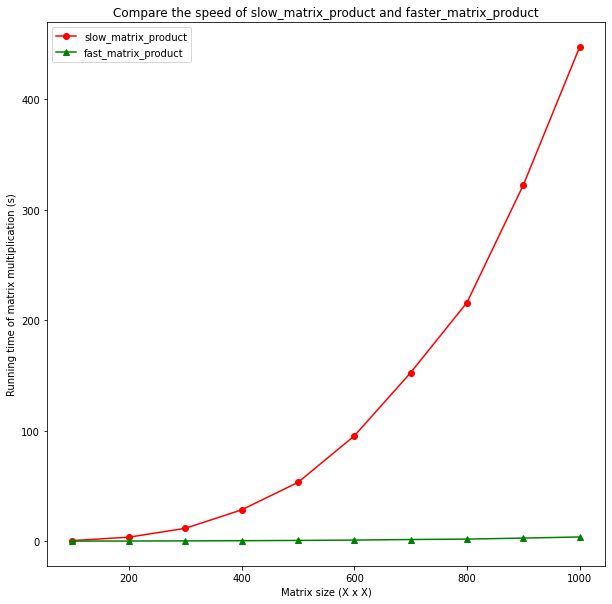

In [ ]:
"""

Run the two functions for matrices of a range of sizes,
and use matplotlib to create a plot showing the time taken for different sized matrices for both functions

"""

# define array to store time
slow_time_arr = np.zeros(len(mat_sizes))
fast_time_arr = np.zeros(len(mat_sizes))

for i in range(len(mat_sizes)):
    size = mat_sizes[i]
    matrix1 = np.random.rand(size, size)
    matrix2 = np.random.rand(size, size)
    slow_t = timeit(slow_matrix_multiplication, number=1)
    fast_t = timeit(fast_matrix_multiplication, number=1)
    slow_time_arr[i] = slow_t
    fast_time_arr[i] = fast_t

# plot image
plt.figure(figsize=(10, 10))
plt.title("Compare the speed of slow_matrix_product and faster_matrix_product")
plt.xlabel("Matrix size (X x X)")
plt.ylabel("Running time of matrix multiplication (s)")
plt.plot(mat_sizes, slow_time_arr, "ro-")
plt.plot(mat_sizes, fast_time_arr, "g^-")
plt.legend(["slow_matrix_product", "fast_matrix_product"])

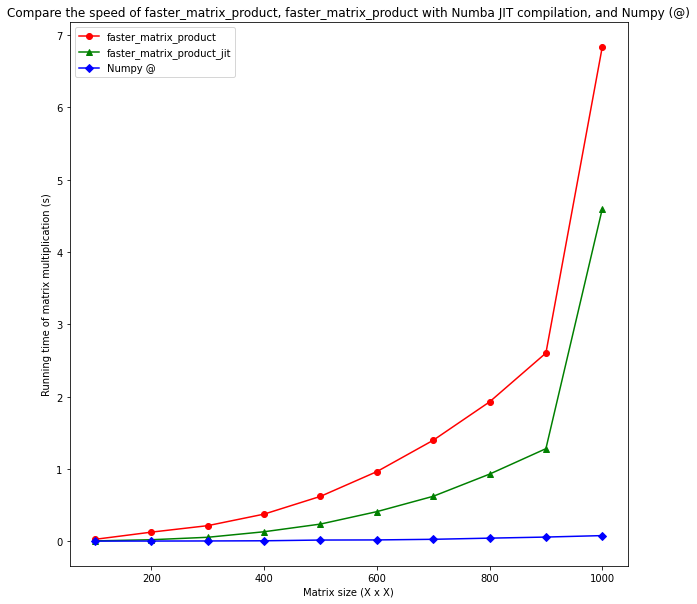

In [ ]:
# -------------- Part2 --------------
"""
Speeding function up with Numba and make plot that shows the times taken to
multiply matrices using faster_matrix_product, faster_matrix_product with Numba JIT compilation, and Numpy (@)

"""

# define array to store time
fast_time_arr = np.zeros(len(mat_sizes))
fast_jit_time_arr = np.zeros(len(mat_sizes))
np_multiply_time_arr = np.zeros(len(mat_sizes))

for i in range(len(mat_sizes)):
    size = mat_sizes[i]
    matrix1 = np.random.rand(size, size)
    matrix2 = np.random.rand(size, size)
    # call function using numba once to avoid the impact of numba's accelerated initialization time on subsequent tests
    temp_t = fast_matrix_multiplication_jit()
    fast_t = timeit(fast_matrix_multiplication, number=1)
    fast_jit_t = timeit(fast_matrix_multiplication_jit, number=1)
    np_t = timeit(numpy_multiplication, number=1)
    fast_time_arr[i] = fast_t
    fast_jit_time_arr[i] = fast_jit_t
    np_multiply_time_arr[i] = np_t

# plot image
plt.figure(figsize=(10, 10))
plt.title("Compare the speed of faster_matrix_product, faster_matrix_product with Numba JIT compilation, and Numpy (@)")
plt.xlabel("Matrix size (X x X)")
plt.ylabel("Running time of matrix multiplication (s)")
plt.plot(mat_sizes, fast_time_arr, "ro-")
plt.plot(mat_sizes, fast_jit_time_arr, "g^-")

plt.plot(mat_sizes, np_multiply_time_arr, "bD-")
plt.legend(["faster_matrix_product", "faster_matrix_product_jit", "Numpy @"])

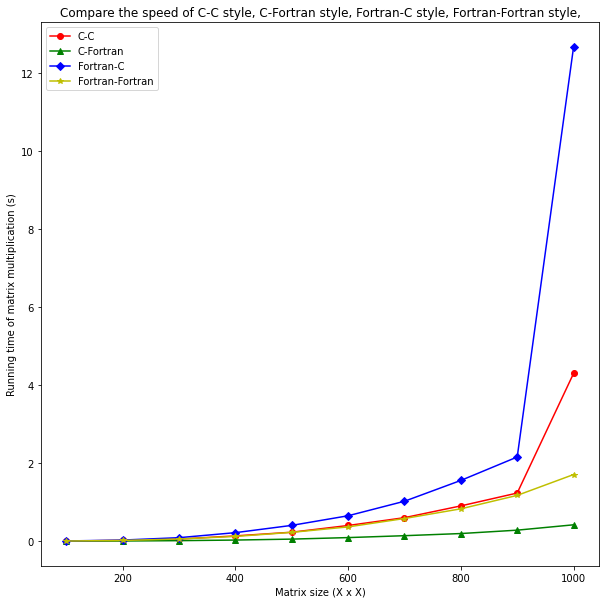

In [ ]:
"""

achieve further speed up of my function by adjusting the memory layout used
and make plot that compares the times taken by my JIT compiled function
when the inputs have different combinations of C-style and Fortran-style ordering

"""
# define array to store time
fast_C_C_time_arr = np.zeros(len(mat_sizes))
fast_C_Fortran_time_arr = np.zeros(len(mat_sizes))
fast_Fortran_C_time_arr = np.zeros(len(mat_sizes))
fast_Fortran_Fortran_time_arr = np.zeros(len(mat_sizes))

for i in range(len(mat_sizes)):
    size = mat_sizes[i]
    # print(size)
    matrix1 = np.random.rand(size, size)
    matrix2 = np.random.rand(size, size)
    matrix1_fortran = np.asfortranarray(matrix1)
    matrix2_fortran = np.asfortranarray(matrix2)
    # call function using numba once to avoid the impact of numba's accelerated initialization time on subsequent tests
    temp_t = fast_matrix_multiplication_jit()
    fast_jit_C_C_t = timeit(fast_matrix_c_c_multiplication_jit, number=1)
    fast_jit_C_fortran_t = timeit(fast_matrix_c_fortran_multiplication_jit, number=1)
    fast_jit_fortran_C_t = timeit(fast_matrix_fortran_c_multiplication_jit, number=1)
    fast_jit_fortran_fortran_t = timeit(fast_matrix_fortran_fortran_multiplication_jit, number=1)
    fast_C_C_time_arr[i] = fast_jit_C_C_t
    fast_C_Fortran_time_arr[i] = fast_jit_C_fortran_t
    fast_Fortran_C_time_arr[i] = fast_jit_fortran_C_t
    fast_Fortran_Fortran_time_arr[i] = fast_jit_fortran_fortran_t

# plot image
plt.figure(figsize=(10, 10))
plt.title("Compare the speed of C-C style, C-Fortran style, Fortran-C style, Fortran-Fortran style,")
plt.xlabel("Matrix size (X x X)")
plt.ylabel("Running time of matrix multiplication (s)")
plt.plot(mat_sizes, fast_C_C_time_arr, "ro-")
plt.plot(mat_sizes, fast_C_Fortran_time_arr, "g^-")
plt.plot(mat_sizes, fast_Fortran_C_time_arr, "bD-")
plt.plot(mat_sizes, fast_Fortran_Fortran_time_arr, "y*-")
plt.legend(["C-C", "C-Fortran", "Fortran-C", "Fortran-Fortran"])

In my opinion, the C-Fortran style is the fastest, then the Fortran-Fortran style, followed by the C-C style, and the slowest is the Fortran-C style, and finally, the image plotted by my experiment also proves my point of view.

The reason is that C-Style ordering aligns the matrix row by row in memory, and Fortran Style ordering aligns the matrix column by column in memory. When the first matrix uses C-Style ordering and the second matrix uses Fortran-Style ordering, when being arranged in memory and doing mutilplication, it conforms to the operation sequence of multiplying the rows of the first matrix and the columns of the second matrix in the matrix multiplication operation (rows * columns). So it is the fastest.

(Column-major nature has better cache performance than row-major nature and Fortran language is designed to be used to fastly compute mathematical operations, so it is faster than C. Therefore, the Fortran-Fortran ordering style is faster than the C-C ordering style. Finally, Fortran-C's ordering does the matrix multiplication in memory in the reverse order of the actual matrix multiplication, so it is the slowest.)